In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Data curation using pandas

## a. 

In [2]:
dfcrossmatches_small = pd.read_pickle("/Users/javier/Documents/university/7th-semester/astroinformatic/dfcrossmatches_small.pickle")

In [57]:
dfcrossmatches_small.head()

,classALeRCE,ra,dec,period,source,id_source,class_source,separation_arcsec
oid,,,,,,,,
ZTF18aaveffj,LPV,291.520423,21.930962,NaN,GAIADR2VS,2018953972876187648.0,MIRA_SR,0.067312
ZTF19aauyvnv,LPV,270.298238,-17.722810,NaN,GAIADR2VS,4143774487177066496.0,MIRA_SR,0.062104
ZTF18ablqvvc,RRL,271.180157,-6.556286,NaN,GAIADR2VS,4171403011041441792.0,RRAB,0.095138
ZTF19abiblfd,RRL,268.188213,-17.161156,NaN,GAIADR2VS,4144758786310249984.0,RRAB,0.043913
ZTF18acbvvku,AGN,48.110790,39.274936,NaN,MILLIQUAS,4C 39.11,A,0.055433


In [41]:
# Viewing the columns names
for col in dfcrossmatches_small.columns:
    print(col)

classALeRCE
ra
dec
period
source
id_source
class_source
separation_arcsec


In [3]:
classes = dfcrossmatches_small['classALeRCE']

Text(0, 0.5, 'Frequency')

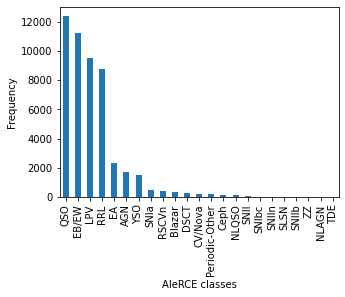

In [4]:
fig, ax = plt.subplots(figsize=(5, 3.5))
ax = classes.value_counts().plot.bar()
ax.set_xlabel('AleRCE classes')
ax.set_ylabel('Frequency')

## b.

In [6]:
# Importing the data from .pickle to DF
features_small = pd.read_pickle('/Users/javier/Documents/university/7th-semester/astroinformatic/features_small.pickle')

In [50]:
# Printing a part of the DF
features_small

,name,value,fid,version
oid,,,,
ZTF17aaaabrg,Amplitude,0.242504,1,feature_0.0.1
ZTF17aaaabrg,Amplitude,0.232499,2,feature_0.0.1
ZTF17aaaabrg,AndersonDarling,1.000000,1,feature_0.0.1
ZTF17aaaabrg,AndersonDarling,1.000000,2,feature_0.0.1
ZTF17aaaabrg,Autocor_length,1.000000,1,feature_0.0.1
...,...,...,...,...
ZTF21abkylyc,Std,0.239856,2,feature_0.0.1
ZTF21abkylyc,StetsonK,NaN,1,feature_0.0.1
ZTF21abkylyc,StetsonK,0.886870,2,feature_0.0.1


In [7]:
# Pivoting columns and values
features_small_pivoted = features_small.pivot(values='value', columns=['name', 'fid'])

In [7]:
features_small_pivoted.head()

name         Amplitude           AndersonDarling           Autocor_length  \
fid                 1         2               1         2              1    
oid                                                                         
ZTF17aaaabrg  0.242504  0.232499             1.0  1.000000            1.0   
ZTF17aaaabtj  0.294114  0.216206             1.0  1.000000            1.0   
ZTF17aaaacml  0.179008  0.162632             1.0  1.000000            1.0   
ZTF17aaaacnc  0.199403  0.215955             1.0  0.999978            1.0   
ZTF17aaaacnt  0.671062  0.498549             1.0  0.775576            1.0   

name              Beyond1Std            Con            ...       Std  \
fid            2          1         2    1         2   ...        2    
oid                                                    ...             
ZTF17aaaabrg  1.0   0.426471  0.361446  0.0  0.000000  ...  0.164944   
ZTF17aaaabtj  1.0   0.489510  0.390909  0.0  0.009259  ...  0.119271   
ZTF17aaaacml  1.0   0.403846  0.229508  0.0  0.000000  ...  0.115176   
ZTF17aaaacnc  1.0   0.062500  0.350000  0.0  0.000000  ...  0.102518   
ZTF17aaaacnt  1.0   0.242105  0.298246  0.0  0.000000  ...  0.271919   

name          StetsonK           g-W2 g-W3 Power_rate r-W2 r-W3 W1-W2 W2-W3  
fid                 1         2    0    0          12   0    0     0     0   
oid                                                                          
ZTF17aaaabrg  0.912734  0.958511  NaN  NaN        NaN  NaN  NaN   NaN   NaN  
ZTF17aaaabtj  0.967987  0.758365  NaN  NaN        NaN  NaN  NaN   NaN   NaN  
ZTF17aaaacml  0.946447  0.786144  NaN  NaN        NaN  NaN  NaN   NaN   NaN  
ZTF17aaaacnc  0.525565  0.786877  NaN  NaN        NaN  NaN  NaN   NaN   NaN  
ZTF17aaaacnt  0.820105  0.772239  NaN  NaN        NaN  NaN  NaN   NaN   NaN  

[5 rows x 179 columns]

In [16]:
# We select a certain value with DF.iloc[row, column]
features_small_pivoted.iloc[0, 0]

0.24250411987304688

In [52]:
for i in range(len(features_small_pivoted.isna().sum())):
    print(features_small_pivoted.isna().sum()[i])

3800
5908
3800
5908
3800
5908
3800
5908
3800
5908
1327
2340
1327
2340
3800
5908
14626
11628
14626
11628
3800
5908
3800
5908
1327
2340
0
0
1327
2340
1327
2340
3667
13310
3667
13310
3800
5908
2118
3131
2118
3131
2118
3131
2118
3131
2118
3131
2118
3131
2118
3131
2118
3131
2118
3131
2118
3131
2118
3131
2118
3131
2118
3131
2118
3131
3800
5908
1327
2340
14626
11628
14626
11628
3800
5908
1606
2658
14626
11628
3800
5908
3800
5908
1327
2340
3800
5908
3800
5908
3800
5908
1606
2658
14626
11628
5523
8201
4755
7420
3611
6010
3611
6010
5523
8201
1327
2340
791
1327
2340
1327
2340
1327
2340
1327
2340
1327
2340
3800
5908
3800
5908
3800
5908
1327
2340
791
791
791
8433
8433
8433
791
1736
2980
1736
2980
3800
5908
3800
5908
0
3800
5908
3800
5908
3800
5908
0
3800
5908
3800
5908
1327
2340
1327
2340
4735
6921
1327
2340
1327
2340
1327
2340
1327
2340
3800
5908
3800
5908
34160
34163
32389
34281
34283
33853
33856


## c.

In [8]:
# Computing the median of each column
columns_median = features_small_pivoted.median(axis=0)

In [54]:
columns_median

name             fid
Amplitude        1      0.402083
                 2      0.341036
AndersonDarling  1      0.999934
                 2      0.999747
Autocor_length   1      1.000000
                          ...   
Power_rate       12     0.029785
r-W2             0      4.645677
r-W3             0      7.501856
W1-W2            0      0.559000
W2-W3            0      2.527000
Length: 179, dtype: float64

In [9]:
# Filling the NaNs value of the DF with the median value of each column
features_small_pivoted = features_small_pivoted.fillna(value=columns_median)

In [56]:
features_small_pivoted

name         Amplitude           AndersonDarling           Autocor_length  \
fid                 1         2               1         2              1    
oid                                                                         
ZTF17aaaabrg  0.242504  0.232499        1.000000  1.000000            1.0   
ZTF17aaaabtj  0.294114  0.216206        1.000000  1.000000            1.0   
ZTF17aaaacml  0.179008  0.162632        1.000000  1.000000            1.0   
ZTF17aaaacnc  0.199403  0.215955        1.000000  0.999978            1.0   
ZTF17aaaacnt  0.671062  0.498549        1.000000  0.775576            1.0   
...                ...       ...             ...       ...            ...   
ZTF21abkjyui  0.683250  0.341036        0.677959  0.999747            1.0   
ZTF21abkndcw  0.617332  0.341036        0.989514  0.999747            1.0   
ZTF21abknlix  0.077879  0.075038        0.520365  0.386736            3.0   
ZTF21abkrimu  0.402083  0.402185        0.999934  1.000000            1.0   
ZTF21abkylyc  0.402083  0.369650        0.999934  0.576287            1.0   

name              Beyond1Std            Con            ...       Std  \
fid            2          1         2    1         2   ...        2    
oid                                                    ...             
ZTF17aaaabrg  1.0   0.426471  0.361446  0.0  0.000000  ...  0.164944   
ZTF17aaaabtj  1.0   0.489510  0.390909  0.0  0.009259  ...  0.119271   
ZTF17aaaacml  1.0   0.403846  0.229508  0.0  0.000000  ...  0.115176   
ZTF17aaaacnc  1.0   0.062500  0.350000  0.0  0.000000  ...  0.102518   
ZTF17aaaacnt  1.0   0.242105  0.298246  0.0  0.000000  ...  0.271919   
...           ...        ...       ...  ...       ...  ...       ...   
ZTF21abkjyui  1.0   0.333333  0.325000  0.0  0.000000  ...  0.212839   
ZTF21abkndcw  1.0   0.166667  0.325000  0.0  0.000000  ...  0.212839   
ZTF21abknlix  1.0   0.416667  0.285714  0.0  0.000000  ...  0.048887   
ZTF21abkrimu  1.0   0.329268  0.322581  0.0  0.000000  ...  0.268336   
ZTF21abkylyc  1.0   0.329268  0.250000  0.0  0.000000  ...  0.239856   

name          StetsonK                g-W2      g-W3 Power_rate      r-W2  \
fid                 1         2         0         0          12        0    
oid                                                                         
ZTF17aaaabrg  0.912734  0.958511  4.943869  7.820271   0.029785  4.645677   
ZTF17aaaabtj  0.967987  0.758365  4.943869  7.820271   0.029785  4.645677   
ZTF17aaaacml  0.946447  0.786144  4.943869  7.820271   0.029785  4.645677   
ZTF17aaaacnc  0.525565  0.786877  4.943869  7.820271   0.029785  4.645677   
ZTF17aaaacnt  0.820105  0.772239  4.943869  7.820271   0.029785  4.645677   
...                ...       ...       ...       ...        ...       ...   
ZTF21abkjyui  0.808906  0.825233  4.943869  7.820271   0.000866  4.645677   
ZTF21abkndcw  0.777093  0.825233  2.248809  4.216808   0.000090  1.479431   
ZTF21abknlix  0.839430  0.776154  8.182998  8.388997   0.053091  5.690223   
ZTF21abkrimu  0.834742  0.850610  4.943869  7.820271   0.002877  4.645677   
ZTF21abkylyc  0.834742  0.886870  4.943869  7.820271   0.184779  4.645677   

name              r-W3     W1-W2     W2-W3  
fid                 0         0         0   
oid                                         
ZTF17aaaabrg  7.501856  0.559000  2.527000  
ZTF17aaaabtj  7.501856  0.559000  2.527000  
ZTF17aaaacml  7.501856  0.559000  2.527000  
ZTF17aaaacnc  7.501856  0.559000  2.527000  
ZTF17aaaacnt  7.501856  0.559000  2.527000  
...                ...       ...       ...  
ZTF21abkjyui  7.501856  0.559000  2.527000  
ZTF21abkndcw  3.447430 -0.316000  1.967999  
ZTF21abknlix  5.896222  0.051001  0.205999  
ZTF21abkrimu  7.501856  0.559000  2.527000  
ZTF21abkylyc  7.501856  0.559000  2.527000  

[39024 rows x 179 columns]

In [57]:
for i in range(len(features_small_pivoted.isna().sum())):
    print(features_small_pivoted.isna().sum()[i])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


## d.

In [10]:
dfcrossmatches_small.index[1]

'ZTF19aauyvnv'

In [11]:
concated_df = pd.concat([dfcrossmatches_small, features_small_pivoted], axis=1, join='inner')

In [75]:
concated_df

,classALeRCE,ra,dec,period,source,id_source,class_source,separation_arcsec,"(Amplitude, 1)","(Amplitude, 2)",...,"(Std, 2)","(StetsonK, 1)","(StetsonK, 2)","(g-W2, 0)","(g-W3, 0)","(Power_rate, 12)","(r-W2, 0)","(r-W3, 0)","(W1-W2, 0)","(W2-W3, 0)"
oid,,,,,,,,,,,,,,,,,,,,,
ZTF18aaveffj,LPV,291.520423,21.930962,NaN,GAIADR2VS,2018953972876187648.0,MIRA_SR,0.067312,0.264278,0.363577,...,0.195895,0.808636,0.822968,4.943869,7.820271,0.029785,4.645677,7.501856,0.559,2.527
ZTF19aauyvnv,LPV,270.298238,-17.722810,NaN,GAIADR2VS,4143774487177066496.0,MIRA_SR,0.062104,0.402083,0.341036,...,0.212839,0.834742,0.825233,4.943869,7.820271,0.029785,4.645677,7.501856,0.559,2.527
ZTF18ablqvvc,RRL,271.180157,-6.556286,NaN,GAIADR2VS,4171403011041441792.0,RRAB,0.095138,0.402083,0.100148,...,0.053437,0.834742,0.821775,4.943869,7.820271,0.029785,4.645677,7.501856,0.559,2.527
ZTF18acbvvku,AGN,48.110790,39.274936,NaN,MILLIQUAS,4C 39.11,A,0.055433,0.849506,0.653158,...,0.405141,0.909260,0.886437,4.943869,7.820271,0.029785,4.645677,7.501856,0.559,2.527
ZTF18acefhus,QSO,144.857074,11.377435,NaN,MILLIQUAS,SDSS J093925.68+112238.6,Q,0.232170,0.178364,0.192065,...,0.085607,0.739245,0.714789,4.943869,7.820271,0.029785,4.645677,7.501856,0.559,2.527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZTF19aarauin,RRL,171.825527,-23.179639,0.49407,CRTSsouth,3023080017887.0,Blazkho,0.329691,0.587070,0.565650,...,0.319543,0.888937,0.912618,4.943869,7.820271,0.029785,4.645677,7.501856,0.559,2.527
ZTF18aawgtde,QSO,235.612689,29.700747,NaN,MILLIQUAS,FBQS J1542+2942,Q,0.384536,0.072512,0.064309,...,0.035427,0.819063,0.758283,4.943869,7.820271,0.029785,4.645677,7.501856,0.559,2.527
ZTF19adcftsl,QSO,210.322714,22.715302,NaN,MILLIQUAS,LAMOSTJ140117.45+224255.2,Q,0.067727,0.183510,0.341036,...,0.212839,0.861115,0.825233,5.867576,9.412576,0.004110,5.385038,8.930038,1.265,3.545


In [12]:
for i in range(len(concated_df.isna().sum())):
    print(concated_df.isna().sum()[i])

0
0
0
20686
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [13]:
concated_df.dropna(axis=0, inplace=True)

In [17]:
concated_df.head(5)

,classALeRCE,ra,dec,period,source,id_source,class_source,separation_arcsec,"(Amplitude, 1)","(Amplitude, 2)",...,"(Std, 2)","(StetsonK, 1)","(StetsonK, 2)","(g-W2, 0)","(g-W3, 0)","(Power_rate, 12)","(r-W2, 0)","(r-W3, 0)","(W1-W2, 0)","(W2-W3, 0)"
oid,,,,,,,,,,,,,,,,,,,,,
ZTF18acusmwa,RRL,161.238890,2.381415,0.3233030,CRTSnorth,1101058051006.0,RRc,0.633244,0.299761,0.214768,...,0.165384,0.908949,0.935476,4.943869,7.820271,0.029785,4.645677,7.501856,0.559,2.527
ZTF19acmgntk,EB/EW,26.987620,36.923154,0.301382,CRTSnorth,1138008006929.0,EW,1.146676,0.502189,0.446250,...,0.255419,0.799603,0.758067,4.943869,7.820271,0.029785,4.645677,7.501856,0.559,2.527
ZTF18abmvguy,RRL,298.812374,-24.065799,0.5768394,GAIADR2VS,6851521431915793408.0,RRAB,0.052415,0.569722,0.393913,...,0.271526,0.921541,0.885807,4.943869,7.820271,0.029785,4.645677,7.501856,0.559,2.527
ZTF18aabfvqe,EB/EW,79.054117,8.294285,0.3771,CRTSnorth,1107028096412.0,EW,0.948262,0.248260,0.239684,...,0.180796,0.841988,0.879630,4.943869,7.820271,0.029785,4.645677,7.501856,0.559,2.527
ZTF18accaufk,RRL,286.328593,51.268229,0.3562,ASASSN,ASASSN-V J190518.88+511605.6,RRC,0.351361,0.852673,0.677350,...,0.380020,0.779443,0.808921,4.943869,7.820271,0.029785,4.645677,7.501856,0.559,2.527


## e.


Text(0, 0.5, 'Frequency')

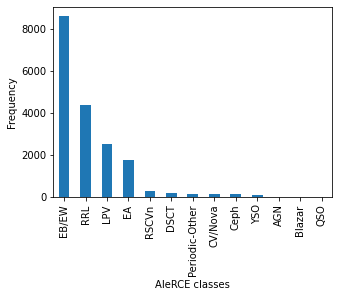

In [18]:
fig2, ax2 = plt.subplots(figsize=(5, 3.5))
ax2 = concated_df['classALeRCE'].value_counts().plot.bar()
ax2.set_xlabel('AleRCE classes')
ax2.set_ylabel('Frequency')

## f.